# BEAUTIFULSOUP SINGLE PAGE CRAWLER

### import dependencies

In [15]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

### get the url page

In [3]:
url = 'https://www.google.com/search?q=pendidikan+indonesia&sca_esv=22628e78e0652884&rlz=1C1ONGR_enID1072ID1072&tbm=nws&sxsrf=ADLYWILSlbFlH97BsTpyQJevm46pCgMXZw:1727836763956&ei=W7L8ZsqTOuuOseMPnuuQyQY&start=0&sa=N&ved=2ahUKEwiKra7E1e6IAxVrR2wGHZ41JGk4ChDy0wN6BAgEEAQ&biw=1600&bih=849&dpr=1.8'

In [4]:
page = requests.get(url)

In [5]:
soup  = BeautifulSoup(page.text, 'html')

<!DOCTYPE html>
<html lang="id">
 <head>
  <meta charset="utf-8"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   pendidikan indonesia - Penelusuran Google
  </title>
  <script nonce="Na3w-j_pLiQ6eK0bROp2MA">
   (function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a=c==="1"||c==="q"&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if(a.tagName==="A"){a=a.getAttribute("data-nohref")==="1";break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:void 0,d=
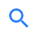
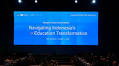
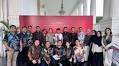
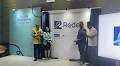
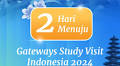

In [6]:
print(soup.prettify())

### create empty list to store data

In [7]:
judul_berita = []
penerbit_berita = []
sinopsis_berita = []
link_berita = []

### find elements from page

In [9]:
#get the headline
judul_get = soup.find_all("div", class_='BNeawe vvjwJb AP7Wnd')

#save the title to list
for tag in judul_get:
    text = tag.get_text()
    if text not in judul_berita:
        judul_berita.append(text)

judul_berita

['Indonesia tunjukkan transformasi pendidikan lewat wadah digital',
 'Kemendikbudristek Temukan 4 Kecurangan Penerima Beasiswa Pendidikan Indonesia',
 'Kemendikbud Ungkap Pelanggaran Mahasiswa Penerima Beasiswa Pendidikan Indonesia',
 'Staf Khusus Nadiem Beberkan Tiga Tantangan Besar Mengelola Pendidikan Tinggi di Indonesia',
 'Pemuda Didorong Berperan Aktif dalam Kebijakan Pendidikan Indonesia',
 'Wajibnya Siswa Naik Kelas Membuat Pendidikan Indonesia Mengalami Kemerosotan - kumparan.com',
 'Cara Cucu Ki Hadjar Dewantara Mentranformasi Pendidikan Indonesia',
 'Pembangunan Pendidikan Kian Berdampak dan Berada di Koridor yang Tepat',
 'Lewat Program Beasiswa, Bayan Peduli Komitmen Dukung Kemajuan Pendidikan Indonesia',
 'Jelang Gateways Study Visit, Indonesia Siap Berbagi Kunci Transformasi Pendidikan']

In [10]:
#get the synopsis
sinposis_get = soup.find_all("div", class_='BNeawe s3v9rd AP7Wnd')
for div in sinposis_get:
    text = div.get_text()
    if text not in sinopsis_berita:  # To avoid duplicates
        sinopsis_berita.append(text)

sinopsis_berita

['ANTARA - Indonesia menunjukkan sejumlah platform berbasis teknologi digital seperti Platform Merdeka Mengajar dan Rapor Pendidikan kepada...17 jam yang lalu',
 'Balai Pembiayaan Pendidikan Tinggi (BPPT) Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi (Kemendikbudristek) menemukan tiga...1 hari lalu',
 'Kemendikbud Ristek menungkap beragam pelanggaran yang dilakukan oleh penerima Beasiswa Pendidikan Indonesia (BPI).22 jam yang lalu',
 'Bali: Staf Khusus Mendikbudristek Bidang Kompetensi dan Manajemen, Pramoda Dei Sudarmo, menyatakan mengelola ekosistem pendidikan tinggi di...4 jam yang lalu',
 'Billy Mambrasar mengajak pemuda berperan aktif dalam kebijakan pendidikan. Temukan ide kreatif mereka untuk menciptakan pendidikan yang lebih inklusif dan...18 jam yang lalu',
 'kewajiban naik kelas membuat penurunan kualitas pendidikan Indonesia. hal ini menjadi sebuah permasalahan yang harus diatasi.5 jam yang lalu',
 'HighScope Indonesia Institute hari ini resmi mengumumkan perubaha

In [11]:
#get and save the link to list
for div in soup.find_all("div", class_="Gx5Zad xpd EtOod pkphOe"):
    a_tag = div.find("a", href=True)
    if a_tag:
        link = a_tag['href']
        # The URLs prefixed with "/url?q="
        clean_link = link.replace("/url?q=", "")
        if clean_link not in link_berita:
            link_berita.append(clean_link)

link_berita

['https://jambi.antaranews.com/rilis-pers/4369531/indonesia-tunjukkan-transformasi-pendidikan-lewat-wadah-digital&sa=U&ved=2ahUKEwj38462mu-IAxWhxzgGHQ1PFv0QxfQBegQICBAC&usg=AOvVaw2TEw--i9lSTEudJmz4yEzT',
 'https://www.detik.com/edu/beasiswa/d-7564848/kemendikbudristek-temukan-4-kecurangan-penerima-beasiswa-pendidikan-indonesia&sa=U&ved=2ahUKEwj38462mu-IAxWhxzgGHQ1PFv0QxfQBegQICRAC&usg=AOvVaw2QwNdZM_SlEOMjiT-bw_CD',
 'https://www.kompas.com/edu/read/2024/10/01/165258371/kemendikbud-ungkap-pelanggaran-mahasiswa-penerima-beasiswa-pendidikan&sa=U&ved=2ahUKEwj38462mu-IAxWhxzgGHQ1PFv0QxfQBegQIBBAC&usg=AOvVaw1KKc87yoo_flqekpYzUx0Z',
 'https://www.medcom.id/pendidikan/news-pendidikan/GbmD341N-staf-khusus-nadiem-beberkan-tiga-tantangan-besar-mengelola-pendidikan-tinggi-di-indonesia&sa=U&ved=2ahUKEwj38462mu-IAxWhxzgGHQ1PFv0QxfQBegQIBRAC&usg=AOvVaw3ciMSSvvRBj7W1ooK0PAiT',
 'https://www.borneonews.co.id/berita/385694-pemuda-didorong-berperan-aktif-dalam-kebijakan-pendidikan-indonesia&sa=U&ved=2ahU

In [12]:
#get the publisher
publisher_get = soup.find_all("div", class_='BNeawe UPmit AP7Wnd lRVwie')

#save the publisher to list
for tag in publisher_get:
    penerbit_berita.append(tag.get_text())

penerbit_berita

['ANTARA News Jambi',
 'detikcom',
 'Kompas.com',
 'Medcom.id',
 'Borneonews',
 'Kumparan',
 'VIVA.co.id',
 'Media Indonesia',
 'Warta Ekonomi',
 'ditpsd.kemdikbud.go.id']

### SAVE DATA AS DATAFRAME

In [23]:
header = ['judul berita', 'penerbit', 'sinopsis', 'link']
data = list(zip(judul_berita, penerbit_berita, sinopsis_berita, link_berita))

df = pd.DataFrame(data=data, columns=header)
df

,judul berita,penerbit,sinopsis,link
0,Indonesia tunjukkan transformasi pendidikan le...,ANTARA News Jambi,ANTARA - Indonesia menunjukkan sejumlah platfo...,https://jambi.antaranews.com/rilis-pers/436953...
1,Kemendikbudristek Temukan 4 Kecurangan Penerim...,detikcom,Balai Pembiayaan Pendidikan Tinggi (BPPT) Keme...,https://www.detik.com/edu/beasiswa/d-7564848/k...
2,Kemendikbud Ungkap Pelanggaran Mahasiswa Pener...,Kompas.com,Kemendikbud Ristek menungkap beragam pelanggar...,https://www.kompas.com/edu/read/2024/10/01/165...
3,Staf Khusus Nadiem Beberkan Tiga Tantangan Bes...,Medcom.id,Bali: Staf Khusus Mendikbudristek Bidang Kompe...,https://www.medcom.id/pendidikan/news-pendidik...
4,Pemuda Didorong Berperan Aktif dalam Kebijakan...,Borneonews,Billy Mambrasar mengajak pemuda berperan aktif...,https://www.borneonews.co.id/berita/385694-pem...
5,Wajibnya Siswa Naik Kelas Membuat Pendidikan I...,Kumparan,kewajiban naik kelas membuat penurunan kualita...,https://m.kumparan.com/ardiyah/wajibnya-siswa-...
6,Cara Cucu Ki Hadjar Dewantara Mentranformasi P...,VIVA.co.id,HighScope Indonesia Institute hari ini resmi m...,https://www.viva.co.id/edukasi/1757570-cara-cu...
7,Pembangunan Pendidikan Kian Berdampak dan Bera...,Media Indonesia,Selama 10 tahun terakhir berdasarkan data Bada...,https://mediaindonesia.com/pendidikan/705132/p...
8,"Lewat Program Beasiswa, Bayan Peduli Komitmen ...",Warta Ekonomi,"Sejak diluncurkan pada April 2022, Bayan Pedul...",https://wartaekonomi.co.id/read545767/lewat-pr...
9,"Jelang Gateways Study Visit, Indonesia Siap Be...",ditpsd.kemdikbud.go.id,"Seperti diyakini oleh UNESCO dan UNICEF, kehad...",https://ditpsd.kemdikbud.go.id/artikel/detail/...


### save dataframe to csv

In [25]:
df.to_csv('single_page_data_crawled.csv')